# Polynomial Linear Regression

### **Step 0: Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### **Step 1: Load data**

In [2]:
dataset = pd.read_csv('data/Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = dataset['Level'].values.reshape(-1,1)
y = dataset['Salary'].values

In [4]:
# print(x)
# print(y)

The dataset is too small, so let's just fit the entire data to see what polynomial features can do.

### **Step 2: Fit model**

First, let's see the performance of linreg.

In [5]:
linreg = LinearRegression()
linreg.fit(x,y)

LinearRegression()

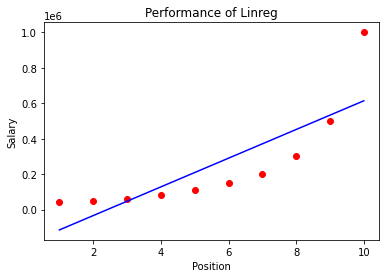

In [6]:
plt.scatter(x,y,color='red')
plt.plot(x,linreg.predict(x),color='blue')
plt.title('Performance of Linreg')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

This performance sucks. Let's see the performance of polyreg.

In [7]:
polyfeat = PolynomialFeatures(5)
x_poly = polyfeat.fit_transform(x)
polyfeat.fit(x_poly, y)
polyreg = LinearRegression()
polyreg.fit(x_poly, y)

LinearRegression()

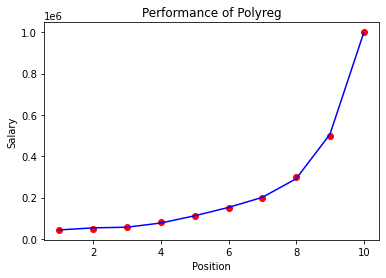

In [8]:
plt.scatter(x,y,color='red')
plt.plot(x,polyreg.predict(x_poly),color='blue')
plt.title('Performance of Polyreg')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Look at dat, dude. Perfect fitting.

There is really nothing much to discuss here, since the programming of Polyreg is simply "Linreg + Poly features".

In [9]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
x = scx.fit_transform(x)
x_poly = scx.fit_transform(x_poly)
scy = StandardScaler()
y = scy.fit_transform(y.reshape(-1,1))

# RUN AFTER FEATURE SCALING ONLY
mse = cross_val_score(linreg,x,y,scoring='neg_mean_squared_error')
print(np.mean(mse))

mse2 = cross_val_score(polyreg,x_poly,y,scoring='neg_mean_squared_error')
print(np.mean(mse2))

-1.0743783939115847
-0.13182600161341657


As shown above, Polyreg does a significantly better job than Linreg in this case.